# Avaliação iterativa de política
#### Prof. Armando Alves Neto - Introdução ao Aprendizado por Reforço - PPGEE/UFMG

Dada uma política $\pi(s)$, podemos avaliar sua função valor via um algoritmo de Programação Dinâmica.

Importando bibliotecas.

In [1]:
import numpy as np
import class_gridworld_env as cge

Criando a classe principal.

Aqui a probabilidade da escolha de uma ação $a$ dado um estado $s$, $\pi(a|s)$, é uniforme (igual para todas as ações).

In [2]:
class IterativePolicyEvaluation:
    ##########################################
    def __init__(self, parameters):

        # environment
        self.env = cge.Gridworld_Env()
        self.size = self.env.getSize()

        # fator de desconto
        self.gamma = parameters['gamma']
        
        # limiar
        self.theta = parameters['theta']

        # inicia o mundo
        self.reset()

    ##########################################
    def reset(self):

        # reseta ambiente
        self.env.reset()

        # value function 
        self.value = np.zeros((self.size, self.size))

        # uniform random policy
        nactions = len(self.env.actions)
        self.pi = (1.0/nactions) * np.ones((*self.value.shape, nactions))

        # quantos passos
        self.steps = 0

Equação de Bellman dado um estado $s$ e uma política $\pi(s)$:

$$
\begin{equation}
    v_\pi(s) = \sum_{a~\in \mathcal{A}} \pi(a|s) \sum_{s' \in \mathcal{S}, ~r} p(s', r | s, a) \big[ r + \gamma v_\pi(s') \big]
    \end{equation}
$$

In [3]:
class IterativePolicyEvaluation(IterativePolicyEvaluation):
    ##########################################
    def bellmanEquation(self, s):
        
        v = 0.0
        
        # probabilidade de escolha das ações (uniforme)
        pi = self.pi[s]
        
        # para todas as possiveis ações
        for a, action in enumerate(self.env.actions):
            
            # aplica ação e recebe proximo estado e recompensa
            sl, r, _, _ = self.env.step(s, action)
            
            # incrementa valor
            v += pi[a] * (r + self.gamma*self.value[sl])
        
        return v

Roda um episódio até o algoritmo convergir. O parâmetro ```in_place``` define se é síncrono ou não. 

In [4]:
class IterativePolicyEvaluation(IterativePolicyEvaluation):
    ##########################################
    def runEpsisode(self, in_place=False):

        while True:
            Delta = 0.0

            # synchronous oy asynchronous mode?
            Vs  = self.value if in_place else np.empty_like(self.value)

            # para todos os estados
            for i in range(len(self.value)):
                for j in range(len(self.value[i])):
                    
                    # estado
                    s = (i, j)
                    
                    # apply bellman expectation equation to each state
                    v = Vs[s]
                    Vs[s] = self.bellmanEquation(s)
                    
                    # Computa o novo Delta
                    Delta = np.max([Delta, np.abs(v - Vs[s])])

            # atualiza valores
            self.value = Vs
            
            # incrementa os passos
            self.steps += 1

            # convergiu?
            if Delta < self.theta: break

        return self.value


Programa principal:
- gamma: fator de desconto
- theta: limiar de iteração

Convergiu em 144 passos!


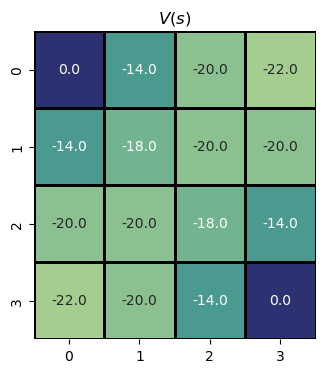

In [5]:
if __name__ == "__main__":
    
    # parametros
    parameters = {
                'gamma' : 1.0,
                'theta' : 1.0e-3,
            }

    # cria a classe
    pol_eval = IterativePolicyEvaluation(parameters)
    
    # tabela de valores obtida
    value_table = pol_eval.runEpsisode()
    print('Convergiu em %d passos!' % pol_eval.steps)

    # renderiza Figure 4.1 (Sutton and Barto)
    pol_eval.env.render(value=value_table)